<a href="https://colab.research.google.com/github/TASAHU18/Diabetes-Onset-Detection-using-Keras/blob/master/Diabetes_Onset_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Onset Detection
The far-ranging developments in healthcare over the past few years have led to a huge collection of data that can be used for analysis. We can now easily predict the onset of various illnesses before they even happen, using advance technology called neural networks.


#### About dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We have 768 instances and the following 8 attributes:

- Number of times pregnant (preg)
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
- Diastolic blood pressure in mm Hg (pres)
- Triceps skin fold thickness in mm (skin)
- 2-Hour serum insulin in mu U/ml (insu)
- Body mass index measured as weight in kg/(height in m)^2 (mass)
- Diabetes pedigree function (pedi)
- Age in years (age)

A particularly interesting attribute used in the study was the Diabetes Pedigree Function, pedi. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. Based on observations in the proceeding section, it is unclear how well this function predicts the onset of diabetes.

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import keras

Using TensorFlow backend.


In [2]:
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Pandas: 0.24.2
Numpy: 1.16.4
Sklearn: 0.21.3
Keras: 2.2.4


Let's import the Pima Indians diabetes dataset, which contains the details of 768 female patients

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [0]:
field_names = ['n_pregnant', 'glucose_concentration', 'blood_pressure (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI', 'pedigree_function', 'age', 'class']

In [0]:
df = pd.read_csv(url, names = field_names)

In [6]:
df.describe()

,n_pregnant,glucose_concentration,blood_pressure (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can notice that there are quite a few places where the value is zero, which may represent missing data.

Having missing data will throw off our algorithm's accuracy. Let's deal with this first.

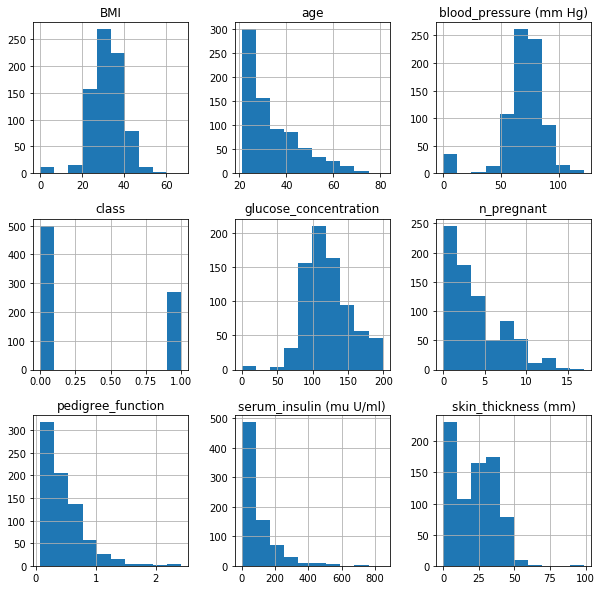

In [7]:
p = df.hist(figsize = (10,10))

In [0]:
# Null count analysis
#import missingno as msno
#p=msno.bar(df)

In [9]:
#Data Preprocessing

df[df['glucose_concentration'] == 0]

,n_pregnant,glucose_concentration,blood_pressure (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Here, we can see that there are five cases where the glucose_concentration is 0, meaning that it is likely that there is some missing information in the dataset. 
Let's put missing values as NaN, excluding those for n_pregnancy, age, and class.

In [0]:
columns = ['glucose_concentration', 'blood_pressure (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)', 'BMI']

for col in columns:
 df[col].replace(0, np.NaN, inplace=True)

In [11]:
df.describe()

,n_pregnant,glucose_concentration,blood_pressure (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can now see that there are a number of instances in the columns modified that show some changes. For example, the number of instances in serum_insulin has dropped to 394, from the initial 768.

Let's drop the missing value and check again.

In [12]:
df.dropna(inplace=True)
df.describe()

,n_pregnant,glucose_concentration,blood_pressure (mm Hg),skin_thickness (mm),serum_insulin (mu U/ml),BMI,pedigree_function,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let's go ahead and convert this dataset into a NumPy array. This can be done using the df.values() function.

In [13]:
dataset = df.values
print(dataset.shape)

(392, 9)


In [0]:
# Let's split the dataset as input features and label
X = dataset[:, 0:8]
Y = dataset[:, 8].astype(int)

In [15]:
print(X.shape)
print(Y.shape)

(392, 8)
(392,)


In [16]:
print(X[:2])

[[1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [17]:
# Normalizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

#Transforming the training data
X_scaled = scaler.transform(X)

#Let's display the transformed data
print(scaler)

data=pd.DataFrame(X_scaled)
data.describe()

StandardScaler(copy=True, with_mean=True, with_std=True)


,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


Here, we still have 392 instances, but they have essentially been normalized so that they have **a mean of nearly zero and a standard deviation of nearly 1**. All of parameters now are on an equal footing, and won't be weighted inappropriately.

In [0]:
# Building Keras model

from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [0]:
# Let's start by defining the model. Used a create_model() function, because we have to repeatedly reinitialize our model. 

seed = 100
np.random.seed(seed)

def create_model():
     # create model
     model = Sequential()
     model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
     model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
     model.add(Dense(1, activation='sigmoid'))
 
     # compile the model
     adam = Adam(lr = 0.01)
     model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
     return model
 

In [20]:
model = create_model()
print(model.summary())

W0829 17:50:15.770038 140683416053632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 17:50:15.786919 140683416053632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 17:50:15.789898 140683416053632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0829 17:50:15.817520 140683416053632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 17:50:15.846988 140683416053632 deprecation_wra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


we have all the information for each layer. The total number of parameters in this network is 113, so it's a relatively small network.

In [0]:
# Initialize the Keras Classifier

model = KerasClassifier(build_fn = create_model, verbose = 0)

In [22]:
# Defining grid search parameters 

batch_size = [10, 20, 40]
epochs = [10,50,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Building and fitting the grid search
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................
[CV] ............ batch_size=10, epochs=10, score=0.718, total=   1.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.748, total=   0.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.854, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.718, total=   2.1s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.695, total=   2.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.815, total=   2.5s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.1s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.710, total=   3.7s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.8s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.779, total=   4.1s
[CV] batch_size=10, epochs=100 .......................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.0s remaining:    0.0s


[CV] ........... batch_size=10, epochs=100, score=0.831, total=   4.4s
[CV] batch_size=20, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   22.4s remaining:    0.0s


[CV] ............ batch_size=20, epochs=10, score=0.756, total=   1.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.763, total=   1.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.808, total=   1.8s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.725, total=   2.7s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.756, total=   2.6s
[CV] batch_size=20, epochs=50 ........................................
[CV] ............ batch_size=20, epochs=50, score=0.838, total=   2.7s
[CV] batch_size=20, epochs=100 .......................................
[CV] ........... batch_size=20, epochs=100, score=0.733, total=   3.5s
[CV] batch_size=20, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
# Summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best score: 0.7857142886032864, using {'batch_size': 20, 'epochs': 100}
0.7729591797201001 (0.05832809005286761) with: {'batch_size': 10, 'epochs': 10}
0.7423469381672996 (0.05229264575564745) with: {'batch_size': 10, 'epochs': 50}
0.7729591858022067 (0.04946633857962282) with: {'batch_size': 10, 'epochs': 100}
0.7755102027131586 (0.022882912280435347) with: {'batch_size': 20, 'epochs': 10}
0.7729591859542594 (0.04779843668270371) with: {'batch_size': 20, 'epochs': 50}
0.7857142886032864 (0.03848804526649413) with: {'batch_size': 20, 'epochs': 100}
0.7653061235133483 (0.03993590918728177) with: {'batch_size': 40, 'epochs': 10}
0.7729591692284662 (0.030047051775506945) with: {'batch_size': 40, 'epochs': 50}
0.7551020418806952 (0.044428506080056884) with: {'batch_size': 40, 'epochs': 100}


 As we can see that 78.57% is the best score we are getting, using 100 epochs with a batch size of 20
 
Now, we will try to reduce the overfitting of the model by introducing the Dropout layer that periodically knocks out some of the neurons so that the others have to pick up the slack. As a result, it prevents any one neuron from becoming too important to the overall network, or too heavily weighted. This is going to help the network generalize to new models more effectively. 

Let's also modify the KerasClassifier a little because we know that the best scenario is to have a batch size of 20 with 100 epochs.

In [24]:
# Reducing overfitting using dropout regularization
from keras.layers import Dropout


seed = 100
np.random.seed(seed)

def create_model(learn_rate, dropout_rate):
     # create model
     model = Sequential()
     model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
     model.add(Dropout(dropout_rate))
     model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
     model.add(Dropout(dropout_rate))
     model.add(Dense(1, activation='sigmoid'))
 
     # compile the model
     adam = Adam(lr = learn_rate)
     model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
     return model

# Initializing keras model 
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# Defining grid search parameters 
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# Building and fitting the grid search
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled, Y)

# Summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.725, total=   4.9s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.779, total=   5.1s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.808, total=   5.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.5s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.702, total=   5.3s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.8s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.779, total=   5.3s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.815, total=   5.4s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.6s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.725, total=   5.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   37.1s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.748, total=   5.7s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   42.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   48.7s remaining:    0.0s
W0829 17:52:24.011076 140683416053632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.785, total=   5.8s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.748, total=   6.2s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.771, total=   6.4s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.815, total=   6.8s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.756, total=   6.6s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.725, total=   6.8s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.854, total=   6.8s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.7780612301157446, using {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7704081637214641 (0.034159150204826544) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7653061247297696 (0.047095942255719794) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7525510211684265 (0.024449296582467077) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7780612301157446 (0.02790754564414863) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7780612250980066 (0.05482284232971851) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.6913265272670862 (0.008733508833237242) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.7678571460502488 (0.036935438132791334) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7500000012164213 (0.04353062291099642) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7525510239053745 (0.024449300626164943) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


As we can see, we achieved our best outcome with a learn rate of 0.001 and dropout rate of 0.1 Lowering the learning rate by just a decimal point prevented our network from overgeneralizing or overfitting too much, in a similar way to the dropout process. 

#### Finding the optimal hyperparameters
Let's optimize the weight initialization that we're applying to the end of each of these neurons. To do this, we will need to modify some parameters and optimizing the search.

We now know the best learn_rate and dropout_rate, so we are going to hardcode these and remove them. We are also going to remove the Dropout layers that we added in the previous section.

Since we are trying to optimize the *activation* and *init* variables, we will define them in the *create_model()* function. We will also replace the *kernel_initializer* and *activation* parameters in the layers with the variables that we just defined.

In [25]:
# Do a grid search to optimize kernel initialization and activation functions

# Define a random seed
seed = 100
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):  # defined variables here
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(4, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)   # hardcoded the learning rate
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# defined the grid search parameters here
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# made a dictionary of the grid search parameters here
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled, Y)

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=softmax, init=uniform ................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.740, total=   8.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.756, total=   8.8s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.823, total=   8.9s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.4s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.748, total=   9.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.5s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.756, total=   9.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.6s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.808, total=   9.9s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   54.5s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.611, total=   9.7s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.695, total=   9.4s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.700, total=   9.6s
[CV] activation=relu, init=uniform ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV] ....... activation=relu, init=uniform, score=0.725, total=   9.8s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.756, total=   9.9s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.869, total=   9.9s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.748, total=  10.0s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.771, total=  10.1s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.823, total=  10.3s
[CV] activation=relu, init=zero ......................................
[CV] .......... activation=relu, init=zero, score=0.611, total=  10.4s
[CV] activation=relu, init=zero ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  6.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.7857142931648663, using {'activation': 'linear', 'init': 'normal'}
0.772959189299418 (0.035850439127250604) with: {'activation': 'softmax', 'init': 'uniform'}
0.7704081716282027 (0.026447769946544075) with: {'activation': 'softmax', 'init': 'normal'}
0.6683673458744068 (0.040922317011154695) with: {'activation': 'softmax', 'init': 'zero'}
0.7831632721484924 (0.061897671268579375) with: {'activation': 'relu', 'init': 'uniform'}
0.7806122541731718 (0.031342815288587005) with: {'activation': 'relu', 'init': 'normal'}
0.6683673458744068 (0.040922317011154695) with: {'activation': 'relu', 'init': 'zero'}
0.7755102090993706 (0.028772600766583566) with: {'activation': 'tanh', 'init': 'uniform'}
0.7780612270746913 (0.03231746775937566) with: {'activation': 'tanh', 'init': 'normal'}
0.6683673458744068 (0.040922317011154695) with: {'activation': 'tanh', 'init': 'zero'}
0.785714290123813 (0.02650267677503863) with: {'activation': 'linear', 'init': 'uniform'}
0.7857142931648663 (0.03

We find that the **linear** activation function performs the best when coupled with a **normal** initialization function. We can now use these to our advantage in order to fine-tune the neurons.

#### Optimizing the number of neurons
Let's tune the number of neurons in each of these layers. 

Let's convert the total number of neurons present in each hidden layer into variables, such as neuron1 and neuron2. and define these variables in the create_model() function, so that they are called every time we execute it.

Let's also change the kernel_initializer and activation values to *normal* and *linear*, since those were the ones that performed best.

In [26]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# Define a random seed
seed = 100
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_scaled, Y)

# summarize the results
print("Best score: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=4, neuron2=2 ............................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.771, total=  12.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.763, total=  12.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.831, total=  13.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.763, total=  13.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   52.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.763, total=  13.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.815, total=  13.3s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.771, total=  13.2s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.763, total=  13.4s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.8min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.831, total=  14.3s
[CV] neuron1=8, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.0min remaining:    0.0s


[CV] ................ neuron1=8, neuron2=2, score=0.771, total=  13.8s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.763, total=  13.9s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.823, total=  14.0s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.771, total=  14.6s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.763, total=  14.3s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.831, total=  14.5s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ................ neuron1=8, neuron2=8, score=0.763, total=  14.6s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.5min finished


Best score: 0.7908163321565609, using {'neuron1': 8, 'neuron2': 8}
0.7882653111401869 (0.030102045674294392) with: {'neuron1': 4, 'neuron2': 2}
0.7806122526526451 (0.024493751760345923) with: {'neuron1': 4, 'neuron2': 4}
0.7882653080991336 (0.030102047419290692) with: {'neuron1': 4, 'neuron2': 8}
0.7857142916443397 (0.026502678918629105) with: {'neuron1': 8, 'neuron2': 2}
0.7882653080991336 (0.030102047419290692) with: {'neuron1': 8, 'neuron2': 4}
0.7908163321565609 (0.03897990239339837) with: {'neuron1': 8, 'neuron2': 8}
0.7882653141812402 (0.03136920303644759) with: {'neuron1': 16, 'neuron2': 2}
0.7882653111401869 (0.03535836473101593) with: {'neuron1': 16, 'neuron2': 4}
0.7882653111401869 (0.030102045674294392) with: {'neuron1': 16, 'neuron2': 8}


we found that having 8 and 8 neurons is the best. We will retrain our algorithm, using 8 neurons in both the layers.

In [27]:
# Retraining the model with optimal hyperparameters

# Define a random seed
seed = 100
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(8, input_dim = neuron1, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

model.fit(X_scaled, Y)

Accuracy : 0.7831632653061225
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       262
           1       0.72      0.57      0.64       130

    accuracy                           0.78       392
   macro avg       0.76      0.73      0.74       392
weighted avg       0.78      0.78      0.78       392



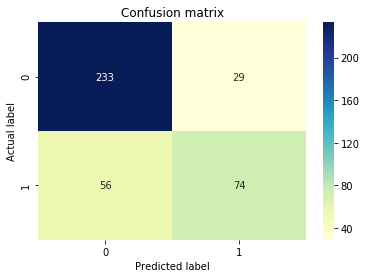

In [28]:
# generate predictions with optimal hyperparameters
y_pred = model.predict(X_scaled)

# Let's understand the results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cnf_matrix = confusion_matrix(Y, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy :', accuracy_score(Y, y_pred))
print(classification_report(Y, y_pred))